In [22]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import skew, kurtosis
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Iris dataset
df = pd.read_csv("Iris.csv")

df.head()



,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [23]:
# Display basic information about the dataset
print(df.info())

# Display summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000    

In [24]:
df = df.drop('Id', axis=1)

# Exclude the 'species' column for statistics calculation
numeric_df = df.select_dtypes(include=[np.number])

# Calculate statistics
statistics = {
    'Standard Deviation': numeric_df.std(),
    'Variance': numeric_df.var(),
    'Skewness': numeric_df.apply(lambda x: skew(x)),
    'Kurtosis': numeric_df.apply(lambda x: kurtosis(x)),
    '75th Percentile': numeric_df.quantile(0.75),
    'Mean': numeric_df.mean(),
    'Median': numeric_df.median(),
    'Mode': numeric_df.mode().iloc[0]
}

# Convert the statistics dictionary to a DataFrame
statistics_df = pd.DataFrame(statistics)
print(statistics_df)


               Standard Deviation  Variance  Skewness  Kurtosis  \
SepalLengthCm            0.828066  0.685694  0.311753 -0.573568   
SepalWidthCm             0.433594  0.188004  0.330703  0.241443   
PetalLengthCm            1.764420  3.113179 -0.271712 -1.395359   
PetalWidthCm             0.763161  0.582414 -0.103944 -1.335246   

               75th Percentile      Mean  Median  Mode  
SepalLengthCm              6.4  5.843333    5.80   5.0  
SepalWidthCm               3.3  3.054000    3.00   3.0  
PetalLengthCm              5.1  3.758667    4.35   1.5  
PetalWidthCm               1.8  1.198667    1.30   0.2  


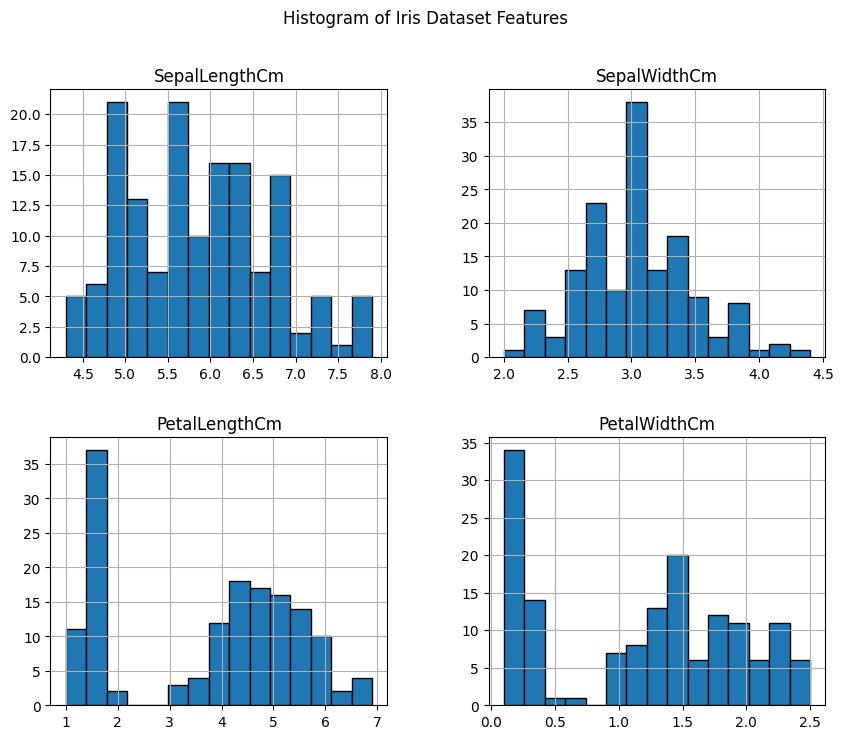

In [25]:
# Histograms for all numeric features
numeric_df.hist(figsize=(10, 8), bins=15, edgecolor='black')
plt.suptitle('Histogram of Iris Dataset Features')
plt.show()

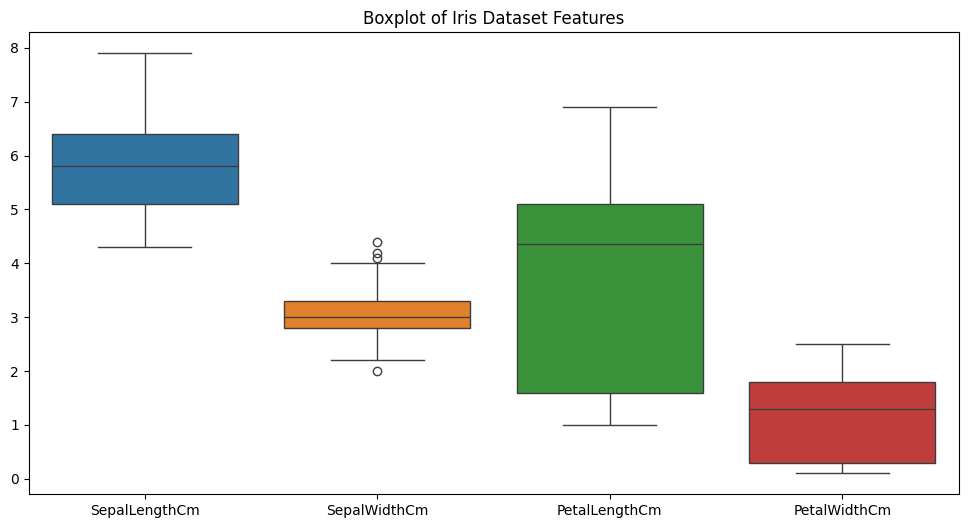

In [26]:
# Boxplot for all numeric features
plt.figure(figsize=(12, 6))
sns.boxplot(data=numeric_df)
plt.title('Boxplot of Iris Dataset Features')
plt.show()


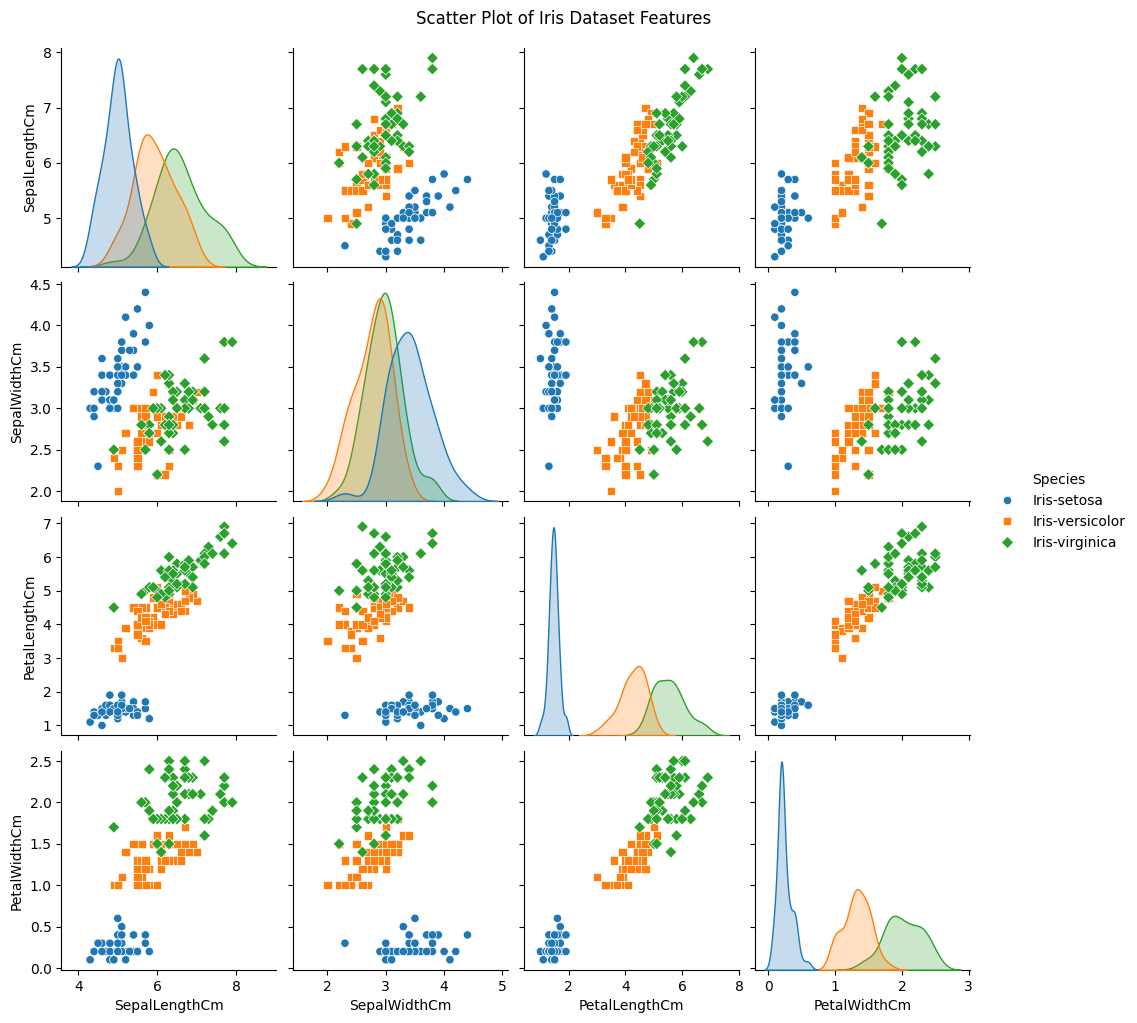

In [27]:
# Pairplot for scatter plots
sns.pairplot(df, hue='Species', markers=['o', 's', 'D'])
plt.suptitle('Scatter Plot of Iris Dataset Features', y=1.02)
plt.show()


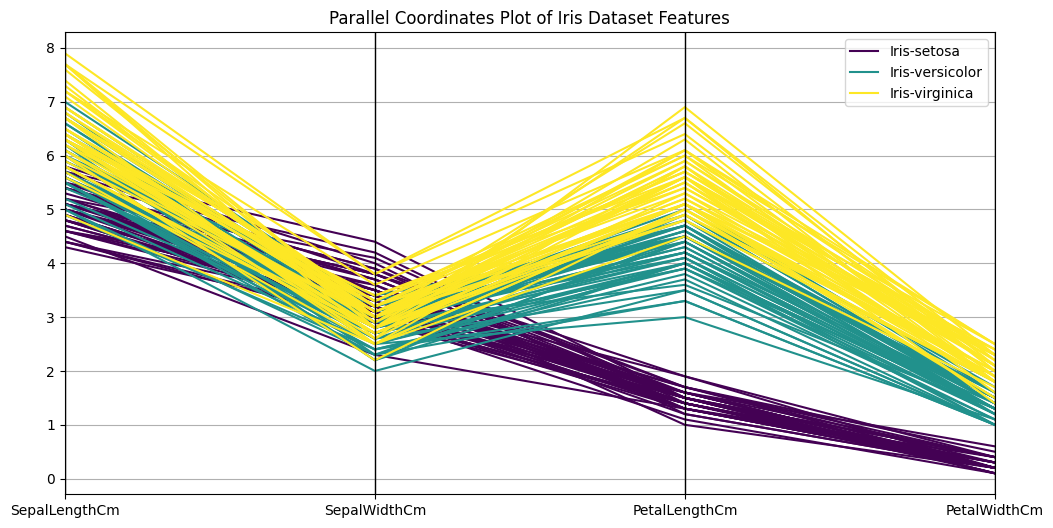

In [28]:
from pandas.plotting import parallel_coordinates

# Parallel coordinates plot
plt.figure(figsize=(12, 6))
parallel_coordinates(df, class_column='Species', colormap='viridis')
plt.title('Parallel Coordinates Plot of Iris Dataset Features')
plt.show()


# PREPROCESSING

In [29]:
# Remove any duplicate rows
df.drop_duplicates(inplace=True)

# Rename columns for consistency
df.columns = [col.lower().replace(' ', '_') for col in df.columns]

# Encode the target variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])

# Split features and target
X = df.drop('species', axis=1)
y = df['species']

# Handle outliers using IQR method
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

X = remove_outliers(X, X.columns)

In [30]:
# Normalize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [31]:
# Feature Engineering
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

# Use get_feature_names_out() instead of get_feature_names()
feature_names = poly.get_feature_names_out(X.columns)
X_poly = pd.DataFrame(X_poly, columns=feature_names)

# Calculate skewness and kurtosis
X_poly['skewness'] = skew(X_scaled, axis=1)
X_poly['kurtosis'] = kurtosis(X_scaled, axis=1)

In [32]:

# Apply outlier removal to the entire dataframe
df_cleaned = remove_outliers(df, df.drop('species', axis=1).columns)

# Split features and target after outlier removal
X = df_cleaned.drop('species', axis=1)
y = df_cleaned['species']

# Normalize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Feature Engineering
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

# Use get_feature_names_out() instead of get_feature_names()
feature_names = poly.get_feature_names_out(X.columns)
X_poly = pd.DataFrame(X_poly, columns=feature_names)

# Calculate skewness and kurtosis
X_poly['skewness'] = skew(X_scaled, axis=1)
X_poly['kurtosis'] = kurtosis(X_scaled, axis=1)

# Feature Selection
from sklearn.feature_selection import SelectKBest, f_classif

# Get the number of features
n_features = X_poly.shape[1]

# Set k to be the minimum of 10 and the number of features
k = min(10, n_features)

# Select top k features
selector = SelectKBest(score_func=f_classif, k=k)
X_selected = selector.fit_transform(X_poly, y)

# Get selected feature names
selected_features = X_poly.columns[selector.get_support()].tolist()
print("Number of features selected:", len(selected_features))
print("Selected features:", selected_features)

# Final Dataset Preparation
# Combine selected features with target variable
final_df = pd.DataFrame(X_selected, columns=selected_features)
final_df['species'] = y

print(final_df.head())
print(final_df.shape)

Number of features selected: 10
Selected features: ['sepallengthcm', 'sepalwidthcm', 'petallengthcm', 'petalwidthcm', 'sepallengthcm petallengthcm', 'sepallengthcm petalwidthcm', 'petallengthcm^2', 'petallengthcm petalwidthcm', 'petalwidthcm^2', 'skewness']
   sepallengthcm  sepalwidthcm  petallengthcm  petalwidthcm  \
0      -0.926103      1.163072      -1.393237     -1.370894   
1      -1.166453     -0.096923      -1.393237     -1.370894   
2      -1.406803      0.407075      -1.450554     -1.370894   
3      -1.526978      0.155076      -1.335921     -1.370894   
4      -1.046278      1.415071      -1.393237     -1.370894   

   sepallengthcm petallengthcm  sepallengthcm petalwidthcm  petallengthcm^2  \
0                     1.290282                    1.269590         1.941110   
1                     1.625146                    1.599084         1.941110   
2                     2.040644                    1.928578         2.104107   
3                     2.039921                 